In [2]:
# Importamos la librería pandas, que es la herramienta estándar para manipular datos en tablas
import pandas as pd

# Definimos la URL directa (API) donde están los datos brutos en formato JSON
url_api = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Leemos los datos directamente desde la URL y los guardamos en una variable llamada 'df_telecom'
# 'df' es la abreviatura estándar de DataFrame (una tabla de datos en Python)
df_telecom = pd.read_json(url_api)

# Mostramos las primeras 5 filas para confirmar que se cargaron bien
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Solicitamos un resumen técnico del DataFrame
# Esto nos mostrará: nombres de columnas, cantidad de datos no nulos y el tipo de dato (int, float, object)
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# Vamos a "aplanar" (desempaquetar) las columnas que contienen diccionarios dentro
# pd.json_normalize convierte los diccionarios internos en columnas independientes

# 1. Desempaquetamos cada columna por separado
df_customer = pd.json_normalize(df_telecom['customer'])
df_phone = pd.json_normalize(df_telecom['phone'])
df_internet = pd.json_normalize(df_telecom['internet'])
df_account = pd.json_normalize(df_telecom['account'])

# 2. Unimos todo en un solo DataFrame final
# Usamos concat con axis=1 para pegar las columnas una al lado de la otra
df_final = pd.concat([df_telecom[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# 3. Mostramos las primeras filas y la nueva estructura
print("Nuevas dimensiones:", df_final.shape)
df_final.head()


Nuevas dimensiones: (7267, 21)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Verificamos los tipos de datos de la tabla ya aplanada
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
# Convertimos 'Charges.Total' a numérico.
# errors='coerce' significa: "Si encuentras texto que no puedas convertir a número, ponle NaN (nulo)"
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Verificamos cuántos valores nulos (NaN) se generaron (es decir, cuántas filas tenían errores)
nulos = df_final['Charges.Total'].isnull().sum()
print(f"Se generaron {nulos} valores nulos después de la conversión.")

# Volvemos a revisar el tipo de dato para confirmar que ahora sea float
print("Tipo de dato actual:", df_final['Charges.Total'].dtype)

Se generaron 11 valores nulos después de la conversión.
Tipo de dato actual: float64


In [7]:
# 1. Eliminamos las filas que tienen valores nulos (los 11 casos de TotalCharges)
# inplace=True significa que el cambio se aplica directamente a la tabla df_final
df_final.dropna(inplace=True)

# 2. Verificamos y eliminamos filas duplicadas
cant_duplicados = df_final.duplicated().sum()
print(f"Se encontraron {cant_duplicados} filas duplicadas.")

# Eliminamos los duplicados manteniendo solo la primera aparición
df_final.drop_duplicates(inplace=True)

# 3. Reiniciamos el índice para que quede ordenado (0, 1, 2...) después de borrar filas
df_final.reset_index(drop=True, inplace=True)

# Vemos cuántos datos nos quedan limpios
print("Datos limpios finales:", df_final.shape)

Se encontraron 0 filas duplicadas.
Datos limpios finales: (7256, 21)


In [8]:
# Vamos a revisar los valores únicos de las columnas de tipo texto (object)
# Esto nos ayuda a ver si hay cosas como "Yes", "yes", "YES" mezcladas, o categorías redundantes.

col_texto = df_final.select_dtypes(include=['object']).columns

for col in col_texto:
    if col != 'customerID': # Saltamos el ID porque es único para cada cliente
        print(f"--- Columna: {col} ---")
        print(df_final[col].unique())
        print("\n")


--- Columna: Churn ---
['No' 'Yes' '']


--- Columna: gender ---
['Female' 'Male']


--- Columna: Partner ---
['Yes' 'No']


--- Columna: Dependents ---
['Yes' 'No']


--- Columna: PhoneService ---
['Yes' 'No']


--- Columna: MultipleLines ---
['No' 'Yes' 'No phone service']


--- Columna: InternetService ---
['DSL' 'Fiber optic' 'No']


--- Columna: OnlineSecurity ---
['No' 'Yes' 'No internet service']


--- Columna: OnlineBackup ---
['Yes' 'No' 'No internet service']


--- Columna: DeviceProtection ---
['No' 'Yes' 'No internet service']


--- Columna: TechSupport ---
['Yes' 'No' 'No internet service']


--- Columna: StreamingTV ---
['Yes' 'No' 'No internet service']


--- Columna: StreamingMovies ---
['No' 'Yes' 'No internet service']


--- Columna: Contract ---
['One year' 'Month-to-month' 'Two year']


--- Columna: PaperlessBilling ---
['Yes' 'No']


--- Columna: PaymentMethod ---
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']




In [9]:
# 1. Eliminar filas donde 'Churn' está vacío
# Filtramos el dataframe para quedarnos solo con lo que NO sea vacío
df_final = df_final[df_final['Churn'] != '']

# 2. Estandarizar respuestas: Convertir "No internet service" y "No phone service" a "No"
# Esto hace que las variables sean comparables (todas tendrán Yes/No)
cols_a_corregir = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_a_corregir:
    df_final[col] = df_final[col].replace('No internet service', 'No')

# También corregimos MultipleLines
df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')

# Verificamos que 'Churn' ya no tenga vacíos y un ejemplo de corrección
print("Valores únicos en Churn:", df_final['Churn'].unique())
print("Valores únicos en TechSupport (ejemplo):", df_final['TechSupport'].unique())
print("Filas finales:", df_final.shape)


Valores únicos en Churn: ['No' 'Yes']
Valores únicos en TechSupport (ejemplo): ['Yes' 'No']
Filas finales: (7032, 21)


In [10]:
# Creamos la nueva columna dividiendo el cargo mensual entre 30
df_final['Charges.Daily'] = df_final['Charges.Monthly'] / 30

# Visualizamos las primeras 5 filas para ver la nueva columna (aparecerá al final, a la derecha)
df_final[['Charges.Monthly', 'Charges.Daily']].head()

,Charges.Monthly,Charges.Daily
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [11]:
# Creamos un mapeo manual para tener control total
mapa_binario = {'Yes': 1, 'No': 0}

# Aplicamos el mapeo a la columna Churn
df_final['Churn_Numerico'] = df_final['Churn'].map(mapa_binario)

# Verificamos que se haya creado correctamente
df_final[['Churn', 'Churn_Numerico']].head()

,Churn,Churn_Numerico
0,No,0
1,No,0
2,Yes,1
3,Yes,1
4,Yes,1


In [12]:
# Obtenemos las estadísticas descriptivas de todas las variables numéricas
# .T (transpuesta) sirve para girar la tabla y leerla mejor (filas por columnas)
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
tenure,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
Charges.Monthly,7032.0,64.798208,30.085974,18.250000,35.58750,70.350,89.862500,118.750000
Charges.Total,7032.0,2283.300441,2266.771362,18.800000,401.45000,1397.475,3794.737500,8684.800000
Charges.Daily,7032.0,2.159940,1.002866,0.608333,1.18625,2.345,2.995417,3.958333
Churn_Numerico,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000


/tmp/ipython-input-3197544398.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_final, palette='pastel')


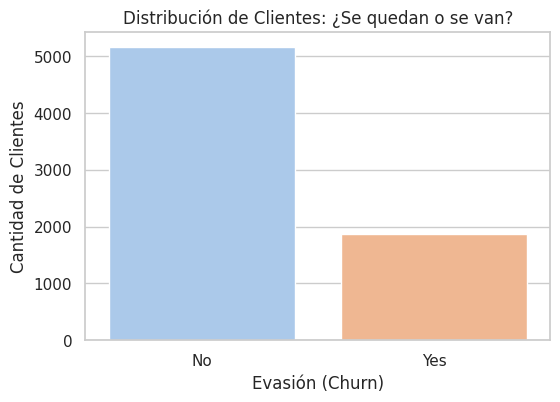

In [13]:
# Importamos las librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo visual para que los gráficos se vean profesionales
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4)) # Tamaño estándar para el lienzo

# TÍTULO: Distribución de la Evasión (Churn)
# Usamos un gráfico de barras (countplot) para ver cuántos SÍ y cuántos NO
ax = sns.countplot(x='Churn', data=df_final, palette='pastel')

# Agregamos título
plt.title('Distribución de Clientes: ¿Se quedan o se van?')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Cantidad de Clientes')
plt.show()

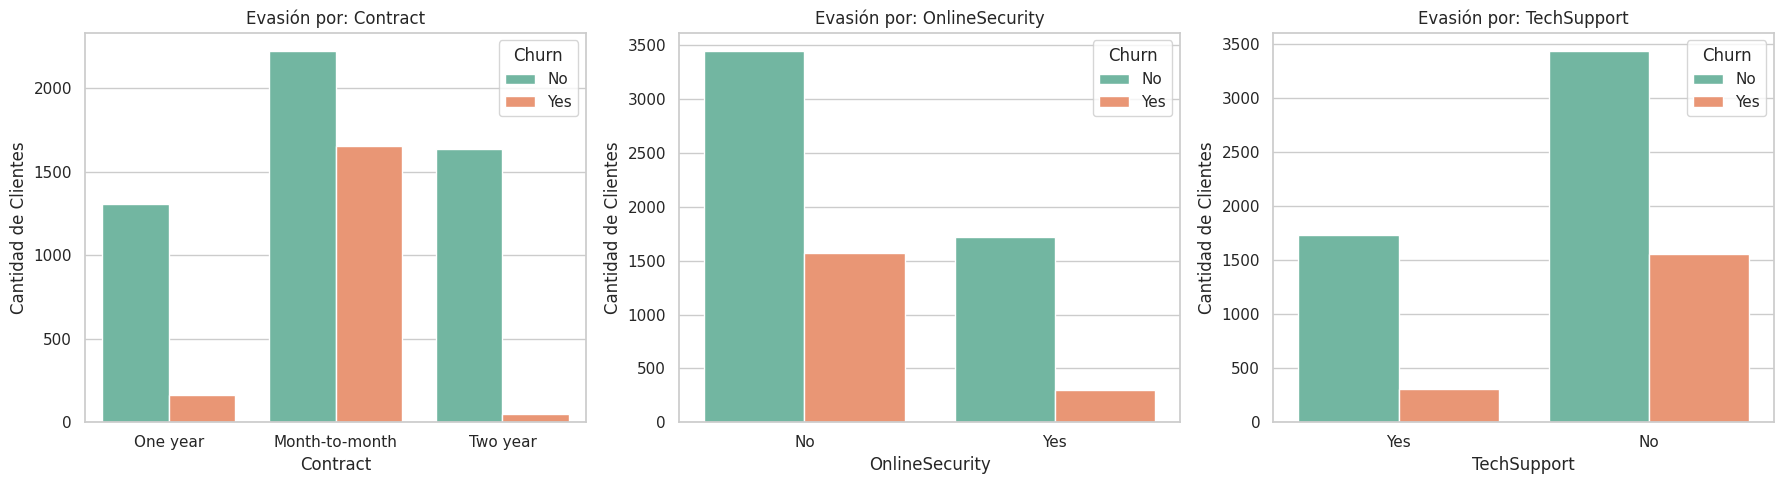

In [14]:
# Vamos a analizar 3 variables clave: Contrato, Seguridad Online y Soporte Técnico
cols_analisis = ['Contract', 'OnlineSecurity', 'TechSupport']

# Preparamos un lienzo ancho para poner 3 gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Creamos los gráficos automáticamente con un bucle
for i, col in enumerate(cols_analisis):
    sns.countplot(x=col, hue='Churn', data=df_final, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Evasión por: {col}')
    axes[i].set_ylabel('Cantidad de Clientes')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

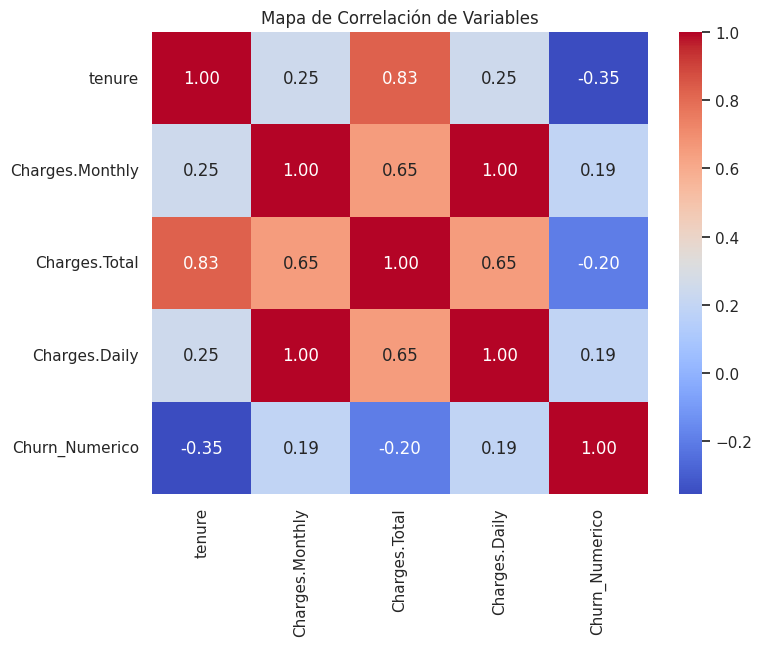

In [15]:
# 1. Seleccionamos solo las columnas numéricas para la correlación
cols_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily', 'Churn_Numerico']

# 2. Calculamos la matriz de correlación
matriz_corr = df_final[cols_numericas].corr()

# 3. Visualizamos con un Mapa de Calor (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación de Variables')
plt.show()